# Support Vector Machine (a.k.a. Large Margin Classification)

## Boring stuff ... installing packages, importing things, fixing the world

In [1]:
# importing required modules
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
import matplotlib.ticker as mticker
import scipy.optimize
import sklearn.svm
import sklearn.datasets
import sklearn.model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
import pandas as pd

# some high DPI settings
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# MNIST digit recognition with SVM

## Downloading dataset & feature scaling

In [2]:
mnist = sklearn.datasets.fetch_mldata("MNIST original", data_home="./")
X = mnist.data / 255.0
y = mnist.target
X.shape, y.shape

((70000, 784), (70000,))

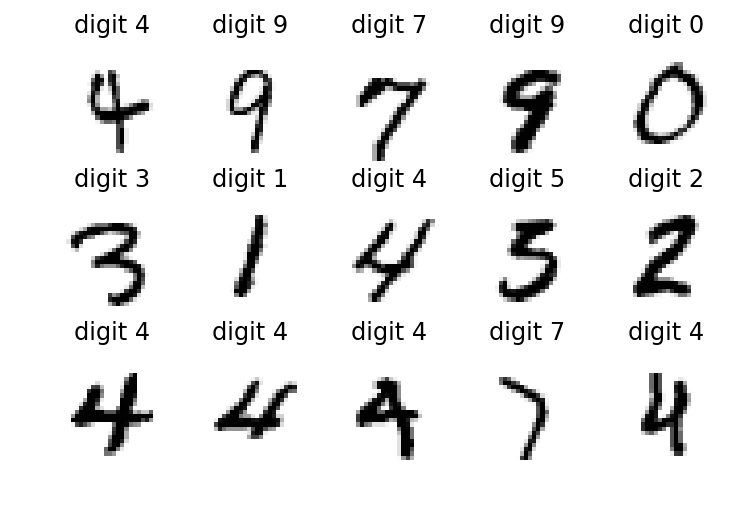

In [3]:
for i in range(15):
    example_index = int(np.random.rand(1)[0] * mnist.data.shape[0])
    plt.subplot(3, 5, i + 1)
    plt.imshow(mnist.data[example_index].reshape((28, 28)), cmap=plt.cm.binary)
    plt.title("digit {}".format(int(mnist.target[example_index])))
    plt.axis("off")
plt.show()

## Training set, test set

We will use 30% of the training data as test set.

In [4]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=True
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((49000, 784), (21000, 784), (49000,), (21000,))

## Train SVM with linear kernel (no kernel)

In [5]:
# ETA 3 min
linear_classifier = sklearn.svm.SVC(kernel="linear", C=5, gamma=0.05)
linear_classifier.fit(X_train, y_train)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.05, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
# ETA 3 min
linear_classifier.score(X_test, y_test)

0.9287142857142857

### Some predictions from the test set

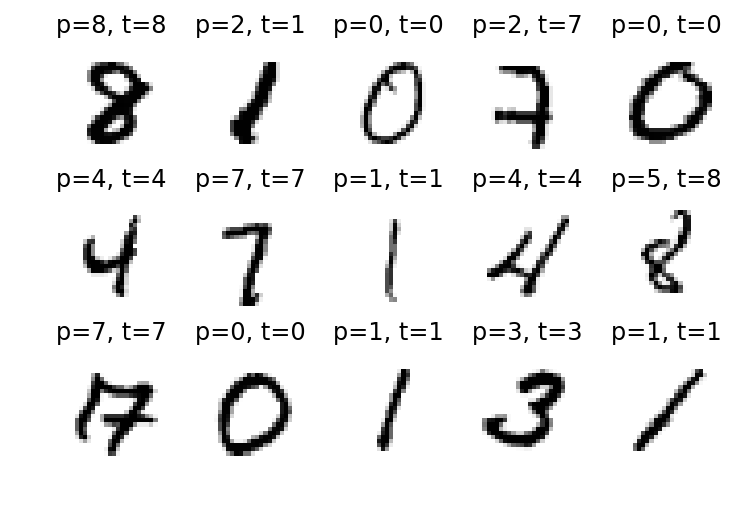

In [7]:
for i in range(15):
    test_index = int(np.random.rand(1)[0] * X_test.shape[0])
    predicted = linear_classifier.predict(X_test[test_index].reshape(1, -1))[0]
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[test_index].reshape((28, 28)), cmap=plt.cm.binary)
    plt.title("p={}, t={}".format(int(predicted), int(y_test[test_index])))
    plt.axis("off")
plt.show()

## Train SVM with RBF kernel (Radial Basis Function Kernel)

In [8]:
# ETA 9 min
rbf_classifier = sklearn.svm.SVC(kernel="rbf", C=5, gamma=0.05)
rbf_classifier.fit(X_train, y_train)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.05, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [9]:
# ETA 6 min
rbf_classifier.score(X_test, y_test)

0.9841428571428571

### Some predictions from the test set

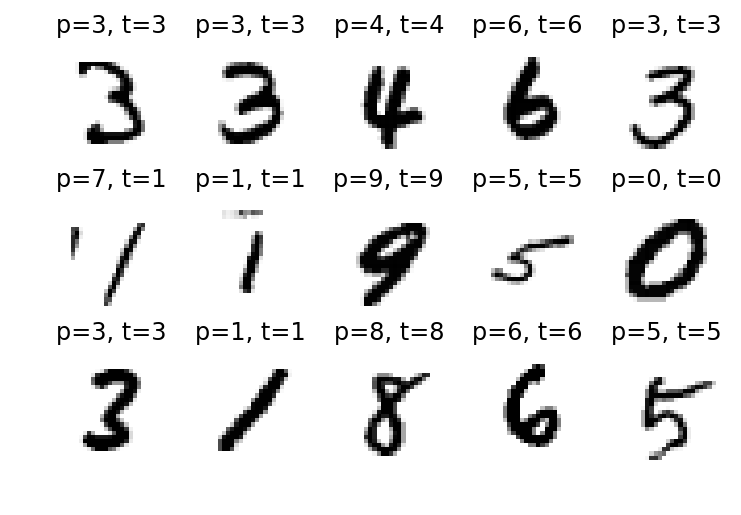

In [10]:
for i in range(15):
    test_index = int(np.random.rand(1)[0] * X_test.shape[0])
    predicted = rbf_classifier.predict(X_test[test_index].reshape(1, -1))[0]
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[test_index].reshape((28, 28)), cmap=plt.cm.binary)
    plt.title("p={}, t={}".format(int(predicted), int(y_test[test_index])))
    plt.axis("off")
plt.show()

### Handwritten prediction

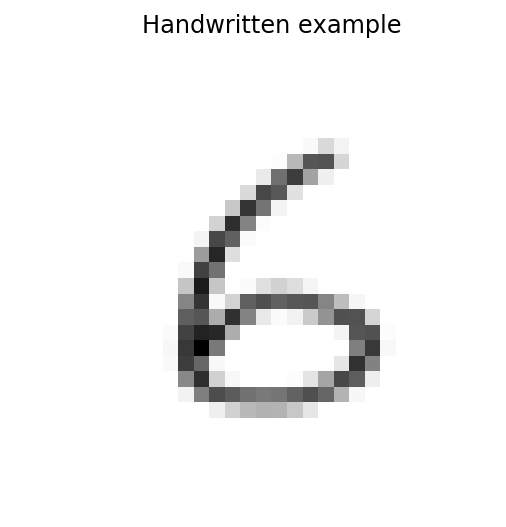

Prediction: 2.0


In [11]:
data = np.array([255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,249,219,243,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,253,187,95,92,216,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,235,118,70,168,240,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,220,81,97,226,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,203,64,123,244,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,212,57,138,252,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,244,82,105,251,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,161,49,223,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,249,75,122,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,200,39,201,255,251,225,211,222,245,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,139,64,249,212,104,88,105,96,94,139,192,246,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,103,95,176,60,137,234,251,242,204,152,89,92,215,255,255,255,255,255,255,255,255,255,255,255,255,255,255,250,77,47,50,177,255,255,255,255,255,255,244,94,91,252,255,255,255,255,255,255,255,255,255,255,255,255,255,247,67,13,128,255,255,255,255,255,255,255,255,134,67,248,255,255,255,255,255,255,255,255,255,255,255,255,255,249,71,111,248,255,255,255,255,255,255,255,231,61,136,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,142,57,211,248,255,255,255,252,229,169,82,101,238,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,242,134,86,100,120,128,124,107,88,110,184,247,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,239,211,188,182,184,202,231,254,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,])

data = 1.0 - (data / 255.0)

plt.imshow(data.reshape((28, 28)), cmap=plt.cm.binary)
plt.title("Handwritten example")
plt.axis("off")
plt.show()

print("Prediction:", rbf_classifier.predict(data.reshape(1, -1))[0])

## Problem with MNIST data set

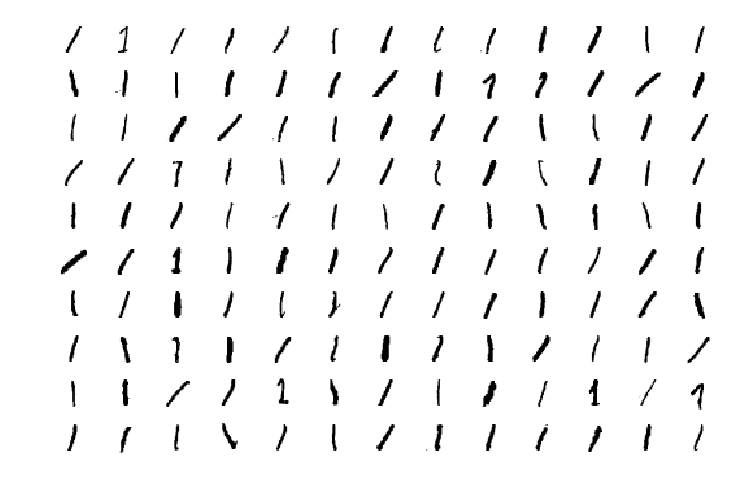

In [12]:
# ones start at training example #5923 in the MNIST data set
# twos start at training example #12665 in the MNIST data set

for count, index in enumerate(np.random.randint(low=5923, high=12664, size=130)):
    plt.subplot(10, 13, count + 1)
    plt.imshow(mnist.data[index].reshape((28, 28)), cmap=plt.cm.binary)
    plt.axis("off")
plt.show()